In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")
df.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,...,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2024,update,dataset_id
0,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Adults only (20-59 years),3.19,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
1,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Adults with children and adolescents,4.29,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
2,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Multigenerational and/or adults with older per...,6.18,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
3,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Multigenerational households,6.18,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
4,Afghanistan,2013,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Adults only (20-59 years),20.60,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc


['Cataract surgical coverage of adults aged 50 and over (%)'
 'Effective cataract surgical coverage of adults aged 50 and over (%)']


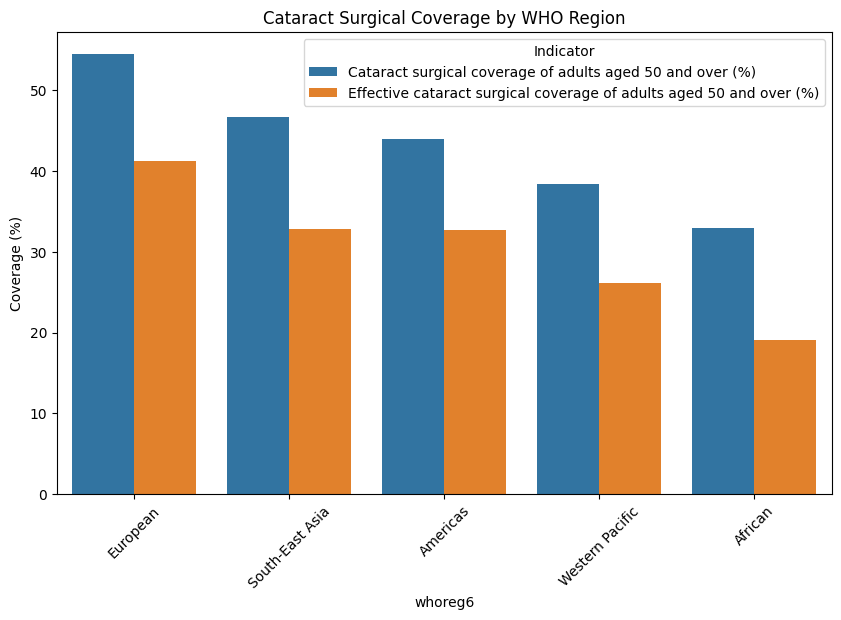

In [24]:
matches = df[df['indicator_name'].str.contains("coverage|essential", case=False, na=False)]
print(matches['indicator_name'].unique())

uhc = df[df['indicator_name'].str.contains("cataract surgical coverage", case=False, na=False)]
uhc.head()

region_avg = uhc.groupby(["whoreg6","indicator_name"])["estimate"].mean().reset_index()
region_avg = region_avg.sort_values("estimate", ascending=False)
region_avg

plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x="whoreg6", y="estimate", hue="indicator_name")
plt.title("Cataract Surgical Coverage by WHO Region")
plt.ylabel("Coverage (%)")
plt.xticks(rotation=45)
plt.legend(title="Indicator")
plt.show()